# Dowloand the Data
### Here is the function to fetch the data 

In [1]:
import numpy as np
np.random.seed(42)

In [2]:
import os
import tarfile
from six.moves import urllib
DOWLOAND_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets","housing")  # -> Tạo ra đường dẫn dataset\housing
# Nối các đường dẫn với nhaul
HOUSING_URL = DOWLOAND_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path): # Kiểm tra xem thư mục housing_path có tồn tại hay không
        os.makedirs(housing_path) # Nếu không có thì tạo thư mục này
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path) 
    # Tải file từ đường dẫn housing_url và lưu nó ở đường dẫn tgz_path
    housing_tgz = tarfile.open(tgz_path)
    # Dùng để mở tệp tin nén có dạng .tgz
    housing_tgz.extractall(path=housing_path)
    # Dùng để giải nến housing_tgz vào đường dẫn housing_path
    housing_tgz.close()
    # Dùng để đóng tệp tin nén sau khi hoàn tác trên đối tượng

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### Take a quick look at the Data structure

In [5]:
housing = load_housing_data()

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info() # Dùng để mô tả nhanh đối tượng 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


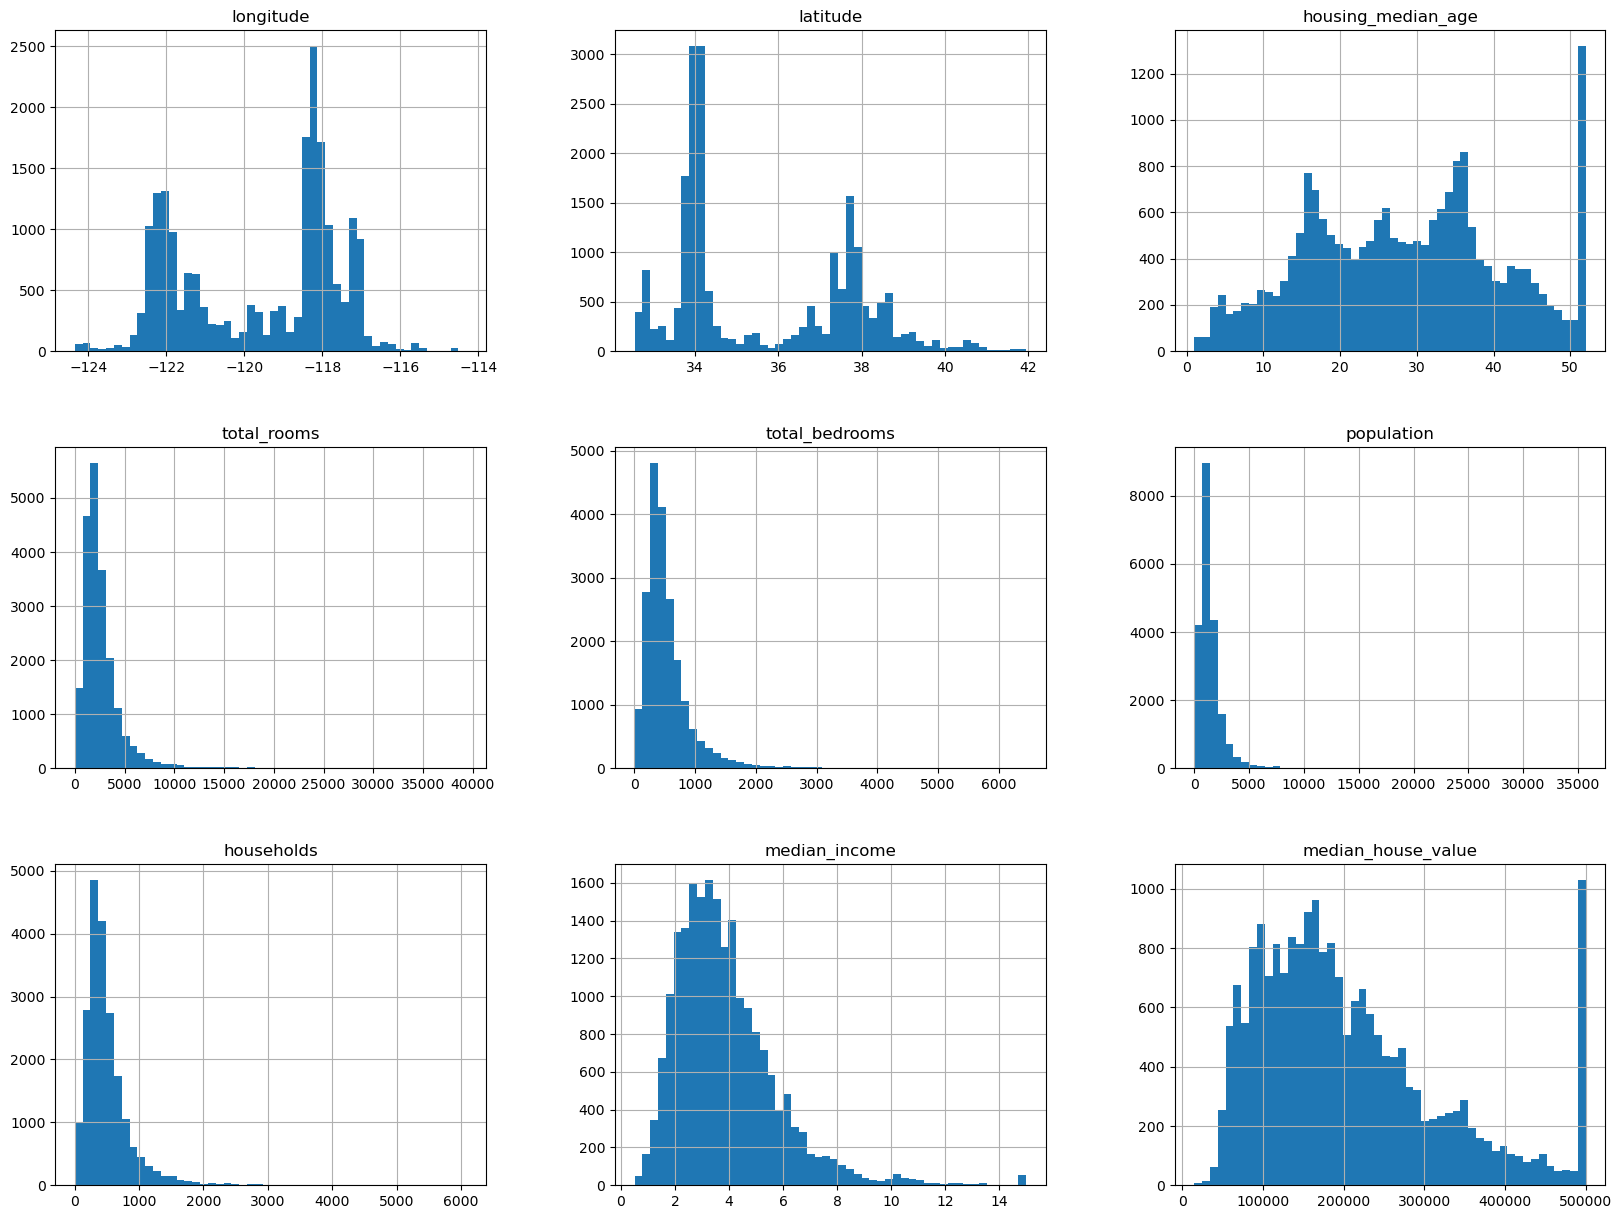

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Create a Testset

In [2]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    # Trả về một mảng 1 chiều bị hoán vị ngẫu nhiên
    # hoặc trả về một ma trận bị hoán vị ngẫu nhiên với một chiều được chỉ định
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
import hashlib

def test_set_check(identifier, test_raito, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_raito
# Sử dụng lệnh hash để tạo một mã định danh cho mỗi identifier
def split_train_test_by_id(data, test_raito, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_raito, hash))
    # Biến id_ đại diện cho từng phần tử trong ids
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
housing_with_id = housing.reset_index() # thêm một index cho cột 
# Câu lệnh đặt lại một index cho data
# index: chỉ mục

In [14]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [15]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

` * Note: * Lưu ý sử dụng phương thức này để thực hành, còn tất cả ở trên xem như tham khảo.`

In [16]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
# Hàm ceil trả lại kiểu số int kiểu float sao cho i >= x -> làm tròn lên
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)
# Hàm where so sánh điều kiện, nếu sai thì thay đổi, inplace thì chỗ thay đổi
# có thực hiện luôn hay không

In [17]:
housing['income_cat']

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

<Axes: >

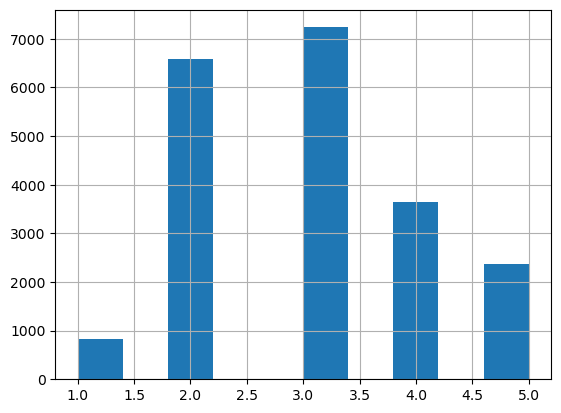

In [18]:
housing['income_cat'].hist()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
# Trình xác thực chéo phân tầng
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# n_split là số lần lập lại xáo trộn và tách
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

In [21]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114462
1.0    0.039789
Name: income_cat, dtype: float64

In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [23]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN


In [24]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


### Discover and Visualize the Data to Gain Insights

In [25]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [26]:
plt.style.use('seaborn')

C:\Users\Admin\AppData\Local\Temp\ipykernel_24084\240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [27]:
# Put the testset aside and you may exploring the trainset
housing = strat_train_set.copy()

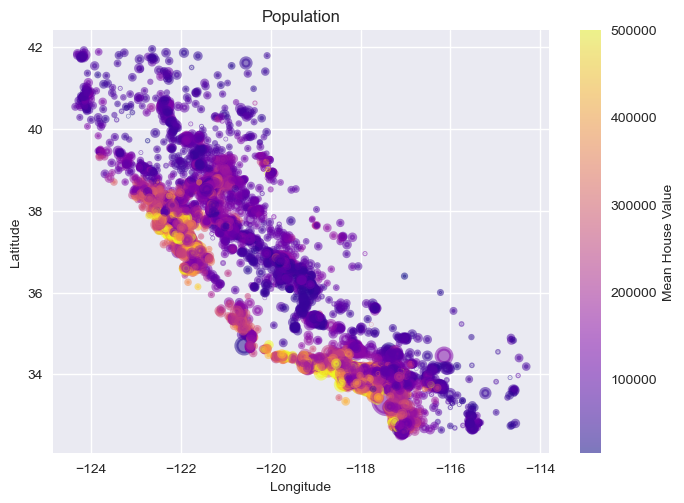

In [28]:
plt.scatter(housing['longitude'],
            housing['latitude'],
            c=housing['median_house_value'],
            cmap='plasma',
            s=housing["population"]/100, 
            linewidths=3,
            alpha=0.5);
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Population')
plt.colorbar(label='Mean House Value')

### Looking for Correlations

In [29]:
corr_matrix = housing.corr()
corr_matrix

C:\Users\Admin\AppData\Local\Temp\ipykernel_24084\1253314489.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [30]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

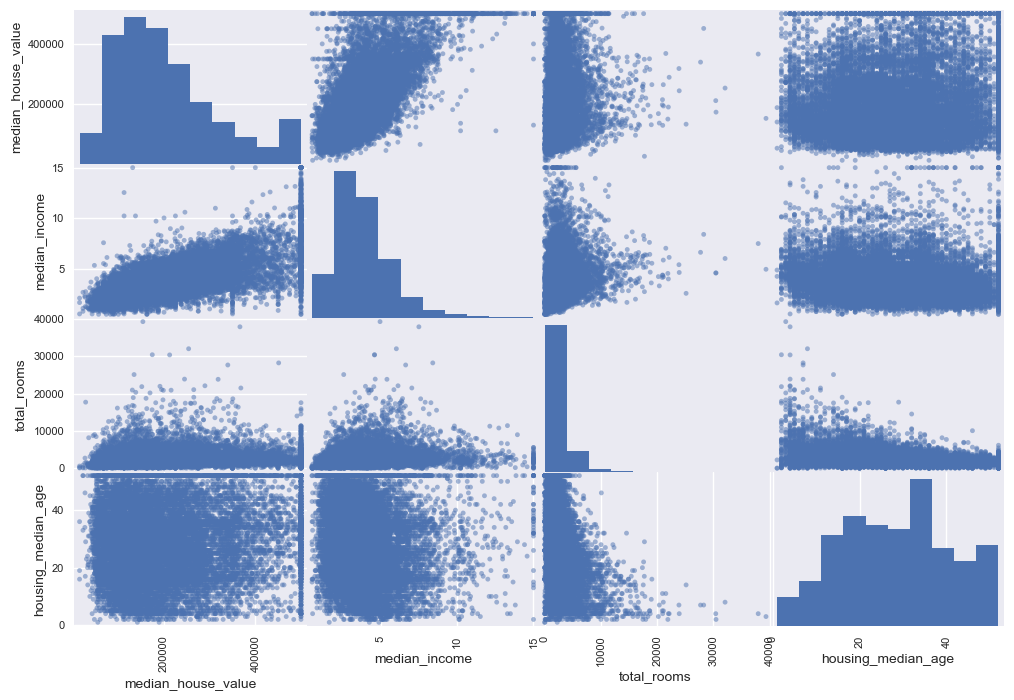

In [31]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))

Text(0, 0.5, 'Median house value')

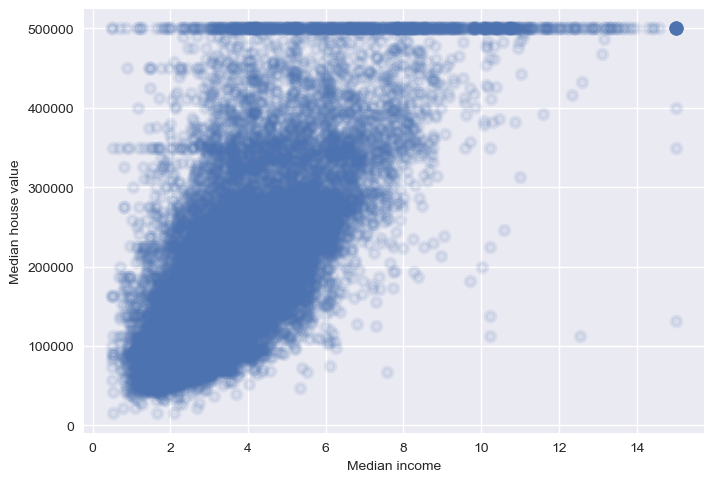

In [32]:
plt.scatter(housing['median_income'], housing['median_house_value'], linewidths=3, alpha=0.1)
plt.xlabel('Median income')
plt.ylabel('Median house value')

In [33]:
housing['median_house_value'].value_counts()

500001.0    786
137500.0    102
162500.0     91
112500.0     80
187500.0     76
           ... 
479000.0      1
282400.0      1
241600.0      1
307200.0      1
34600.0       1
Name: median_house_value, Length: 3669, dtype: int64

### Experimenting with Attribute Combinations

In [34]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [35]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_rooms'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']= housing['population']/housing['households']

In [36]:
corr_matrix = housing.corr()
corr_matrix

C:\Users\Admin\AppData\Local\Temp\ipykernel_24084\1253314489.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_rooms,population_per_household
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466,-0.028374,0.095645,-0.000415
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673,0.107665,-0.116955,0.005426
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146,-0.147184,0.136768,0.015031
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140,0.127549,-0.192655,-0.024806
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781,0.000426,0.086883,-0.028364
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882,-0.074665,0.037736,0.076232
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590,-0.082971,0.067090,-0.027411
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151,0.311528,-0.624650,0.021815
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000,0.146255,-0.259952,-0.021991
rooms_per_household,-0.028374,0.107665,-0.147184,0.127549,0.000426,-0.074665,-0.082971,0.311528,0.146255,1.000000,-0.398529,-0.005316


In [37]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

### Prepare the Data for Machine Learning Alogorithms

In [38]:
housing = strat_train_set.drop('median_house_value', axis=1)
# axis=0 for index, axis=1 for column

In [39]:
housing_labels = strat_train_set['median_house_value'].copy()

In [40]:
# housing.dropna(subset=['total_bedrooms']) opition 1
# housing.drop('total_bedrooms', axis=1) opition 2
# median = housing.['total_bedrooms'].median() opition 3
# housing['total_bedrooms'].fillna(median, inplace=True)

In [41]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [42]:
housing_num  = housing.drop("ocean_proximity", axis=1)

In [43]:
housing_num.loc[(housing.total_rooms==992)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196
12915,-121.31,38.61,17.0,992.0,151.0,316.0,159.0,6.6238
15585,-116.58,33.09,36.0,992.0,224.0,334.0,126.0,3.0089
8246,-118.19,33.78,8.0,992.0,393.0,694.0,331.0,2.5544


In [44]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [45]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [46]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [47]:
X = imputer.transform(housing_num) # Tính toán các giá trị missing
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [48]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [49]:
housing_tr.loc[(housing_tr.total_rooms == 992)& (housing_tr.population==732)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
2325,-122.17,37.75,38.0,992.0,433.0,732.0,259.0,1.6196


### Handling Text and Categorical Attributes

In [50]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [51]:
housing_cat_encoded, housing_categories = housing_cat.factorize() 

In [52]:
housing_cat.factorize() # Trả về 2 mảng như bên dưới

(array([0, 1, 0, ..., 2, 2, 0], dtype=int64),
 Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object'))

In [53]:
housing_cat_encoded[:20]

array([0, 1, 0, 1, 2, 3, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 3, 2],
      dtype=int64)

In [54]:
housing_categories

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [55]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
# fit_transform có biến đầu vào là mảng 2 chiều

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [56]:
housing_cat_1hot # To array

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [57]:
# from sklearn import CategoricalEncoder
# cat_encoder = CategoricalEncoder
# housing_cat_reshaped = housing_cat.values.reshape(-1,1)
# housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)

In [58]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

### Custom Transform

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
     def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
         self.add_bedrooms_per_room = add_bedrooms_per_room
     def fit(self, X, y=None):
         return self # nothing else to do
     def transform(self, X, y=None):
         rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
         population_per_household = X[:, population_ix] / X[:, household_ix]
         if self.add_bedrooms_per_room:
             bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
             return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room] 
            # np.c_ thêm vào mảng X dãy các phân tử theo chiều dọc
         else:
             return np.c_[X, rooms_per_household, population_per_household]

In [60]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [61]:
housing.shape, housing_extra_attribs.shape

((16512, 9), (16512, 11))

### Transformation Pipelines

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('simpleimputer', SimpleImputer(strategy="median")), # Thay thế các giá trị trống
    ("attribs_adder", CombinedAttributesAdder()), # Thêm một số cột để đa dạng data
    ("std_scaler", StandardScaler()) 
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [63]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin
# Class lấy thông tin với đầu vào là data frame
class DataFrameSelector(BaseEstimator, TransformerMixin):
     def __init__(self, attribute_names):
         self.attribute_names = attribute_names
     def fit(self, X, y=None):
         return self
     def transform(self, X):
         return X[self.attribute_names].values

In [65]:
num_attribs = list(housing_num)

In [66]:
num_pipeline = Pipeline([
 ('selector', DataFrameSelector(num_attribs)),
 ('simpleimputer',SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
# Pipeline gọi phương thức transform hoặc cả fit và transform theo thứ tự mỗi lần gọi trong lệnh fit_transform

In [369]:
cat_attribs = ['ocean_proximity']
cat_pipeline = Pipeline([
 ('selector', DataFrameSelector(cat_attribs)),
 ('cat_encoder', OneHotEncoder(sparse=False)),
 ])

In [370]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
 ("num_pipeline", num_pipeline),
 ("cat_pipeline", cat_pipeline),
 ])

In [371]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [372]:
housing_prepared.shape

(16512, 16)

# Select and Train Model

### Training and Evaluating on the Traning Set

In [373]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [374]:
some_data = housing.iloc[:5]
some_lables = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [375]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [376]:
 some_data_prepared_pred = lin_reg.predict(some_data_prepared)

In [377]:
print('Predictiongs:', some_data_prepared_pred)

Predictiongs: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [378]:
print('Labels:', list(some_lables))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [379]:
# transform & fit_transform khác nhau
# fit_transform đưa hệ số vào model và transform hệ số theo cái chuẩn mà các hệ số đã được fit
# transform thì transform các hệ số mà mình đưa vào giống cái chuẩn fit ở trên, chỉ nên fit một lần duy nhất

In [380]:
full_pipeline.transform(some_data)

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [381]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [382]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [431]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [432]:
housing_predictions_tree = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Better Evaluation Using Cross-Validation

In [433]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [434]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring='neg_mean_squared_error', cv=kf, )
tree_rmse_scores = np.sqrt(-scores)

In [435]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std:", scores.std())
display_scores(tree_rmse_scores)

Scores: [65877.28029819 73390.19118238 72814.05133792 69794.0807465
 65451.84993298 69781.94462959 69310.74105945 75865.90874084
 70772.01772223 70470.2524422 ]
Mean: 70352.8318092281
Std: 3027.2252633506187


In [436]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Std: 2880.3282098180657


In [437]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
# n_estimators là số lượng cây trong model càng nhiều cây thì càng chính xác
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [438]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22413.454658589766

In [442]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
# cv chia thành 10 folds
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [53519.05518628 50467.33817051 48924.16513902 53771.72056856
 50810.90996358 54876.09682033 56012.79985518 52256.88927227
 51527.73185039 55762.56008531]
Mean: 52792.92669114079
Std: 2262.8151900582


In [443]:
# Save your model
# from sklearn.externals import joblib
# joblib.dump(my_model, "my_model.pkl")
# # and later...Wa
# my_model_loaded = joblib.load("my_model.pkl")

# Fine-tune Your Model

In [444]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
             {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features':[2, 3, 4]}]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [446]:
 grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [447]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [448]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

### Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

### Ensemble Methods

### Analyze The Best Models and Their Errors

In [449]:
feature_improtances = grid_search.best_estimator_.feature_importances_
feature_improtances
# trả về độ quan trọng của các đặc điểm trong models

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [450]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', "bedrooms_per_room"]

In [451]:
cat_encoder = cat_pipeline.named_steps['cat_encoder']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [452]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_improtances, attributes), reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204355, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887772, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

### Evaluate Your System on the Test Set

In [456]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47873.26095812988

### A full pipeline with both preparation and prediction

In [457]:
full_pipeline_with_predictor = Pipeline([
    ('preparation', full_pipeline),
    ('linear', LinearRegression())
])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

### Exercises

In [458]:
# Exercise 1

In [475]:
from sklearn.svm import SVR
svr = SVR(kernel='linear', C=3000.0)
svr.fit(housing_prepared, housing_labels)
housing_predictions = svr.predict(housing_prepared)
svr_mse = mean_squared_error(housing_labels, housing_pred)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

111095.06635291966

In [476]:
scores = cross_val_score(svr, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error',cv=10)
svr_rmse_scores = np.sqrt(-scores)

In [477]:
pd.Series(svr_rmse_scores).describe()

count       10.000000
mean     70287.658761
std       3483.078894
min      66174.356119
25%      67286.982048
50%      70176.684357
75%      72204.211860
max      77014.597665
dtype: float64

In [478]:
display_scores(svr_rmse_scores)

Scores: [72617.25514899 66174.35611861 67016.84277236 70326.00826552
 67185.36173098 73957.8804695  77014.59766518 70027.36044866
 67591.84300083 70965.0819935 ]
Mean: 70287.65876141419
Std: 3304.338772092427


In [479]:
svr_1 = SVR(kernel='rbf', gamma='auto', C=10.0)
svr_1.fit(housing_prepared, housing_labels)
housing_predictions = svr_1.predict(housing_prepared)
svr_1_mse = mean_squared_error(housing_labels, housing_predictions)
svr_1_rmse = np.sqrt(svr_1_mse)
svr_1_rmse

115467.7362868436

In [480]:
scores = cross_val_score(svr_1, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
svr_1_scores = np.sqrt(-scores)

In [481]:
display_scores(svr_1_scores)

Scores: [114059.07144455 117157.73404771 111061.55098001 117551.42464801
 111851.04783746 120059.83925873 117140.21427136 115472.52073272
 117451.7301393  116016.0801682 ]
Mean: 115782.12135280497
Std: 2623.1705754682575


In [482]:
# Using Grid_Search
param_grid = [{'kernel':['linear'],'C':[10., 30., 100., 300., 1000., 3000.]},
              {'kernel':['rbf'], 'C':[10., 30., 100., 300., 1000., 3000.],
              'gamma':[0.01, 0.03, 0.1, 0.3, 1., 3.]}]

svr_rg = SVR()

grid_search = GridSearchCV(svr_rg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=2, n_jobs=4)
# verbose: hiển thị chi tiết quá trình chạy model
# n_jobs: số công việc được thực hiện đồng thời
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=4,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0],
                          'kernel': ['linear']},
                         {'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [487]:
grid_search.best_params_

{'C': 3000.0, 'gamma': 0.1, 'kernel': 'rbf'}

In [488]:
grid_search.best_estimator_

SVR(C=3000.0, gamma=0.1)

In [489]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

84649.6069847477 {'C': 10.0, 'kernel': 'linear'}
75457.08963038966 {'C': 30.0, 'kernel': 'linear'}
71635.55362707343 {'C': 100.0, 'kernel': 'linear'}
70677.86808389986 {'C': 300.0, 'kernel': 'linear'}
70396.49758150413 {'C': 1000.0, 'kernel': 'linear'}
70323.59020438636 {'C': 3000.0, 'kernel': 'linear'}
117862.25734600889 {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}
116705.16899940853 {'C': 10.0, 'gamma': 0.03, 'kernel': 'rbf'}
116181.25173057283 {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
117387.03040649094 {'C': 10.0, 'gamma': 0.3, 'kernel': 'rbf'}
118591.6498917307 {'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
118886.88638386014 {'C': 10.0, 'gamma': 3.0, 'kernel': 'rbf'}
115703.3166369661 {'C': 30.0, 'gamma': 0.01, 'kernel': 'rbf'}
112566.85657698636 {'C': 30.0, 'gamma': 0.03, 'kernel': 'rbf'}
111163.63743421755 {'C': 30.0, 'gamma': 0.1, 'kernel': 'rbf'}
114583.57105626212 {'C': 30.0, 'gamma': 0.3, 'kernel': 'rbf'}
117948.4051440062 {'C': 30.0, 'gamma': 1.0, 'kernel': 'rbf'}
118769.71853

In [490]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,20.542095,1.601877,3.945712,0.381476,10.0,linear,NaN,"{'C': 10.0, 'kernel': 'linear'}",-7.195222e+09,-6.883484e+09,-7.191545e+09,-7.410983e+09,-7.146546e+09,-7.165556e+09,1.683542e+08,16
1,21.236818,1.747304,3.086793,0.307095,30.0,linear,NaN,"{'C': 30.0, 'kernel': 'linear'}",-5.716869e+09,-5.430246e+09,-5.740268e+09,-5.935399e+09,-5.646080e+09,-5.693772e+09,1.629718e+08,11
2,21.957411,2.398080,3.701697,0.519814,100.0,linear,NaN,"{'C': 100.0, 'kernel': 'linear'}",-5.103684e+09,-4.874959e+09,-5.191770e+09,-5.443169e+09,-5.044681e+09,-5.131653e+09,1.870267e+08,8
3,22.599957,1.532482,3.282861,0.304770,300.0,linear,NaN,"{'C': 300.0, 'kernel': 'linear'}",-4.921774e+09,-4.743532e+09,-5.049795e+09,-5.377533e+09,-4.884171e+09,-4.995361e+09,2.145764e+08,6
4,19.619174,1.788083,3.027951,0.470949,1000.0,linear,NaN,"{'C': 1000.0, 'kernel': 'linear'}",-4.851172e+09,-4.711607e+09,-5.005267e+09,-5.386122e+09,-4.824166e+09,-4.955667e+09,2.347463e+08,5
5,22.533763,1.757961,3.038679,0.131951,3000.0,linear,NaN,"{'C': 3000.0, 'kernel': 'linear'}",-4.824601e+09,-4.713771e+09,-4.991434e+09,-5.393027e+09,-4.804203e+09,-4.945407e+09,2.411098e+08,4
6,26.788223,0.940382,14.112562,1.137617,10.0,rbf,0.01,"{'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}",-1.387185e+10,-1.351657e+10,-1.394519e+10,-1.401594e+10,-1.410801e+10,-1.389151e+10,2.030791e+08,37
7,27.521053,3.822852,13.787699,1.038423,10.0,rbf,0.03,"{'C': 10.0, 'gamma': 0.03, 'kernel': 'rbf'}",-1.359713e+10,-1.325054e+10,-1.366896e+10,-1.374413e+10,-1.383972e+10,-1.362010e+10,2.015485e+08,34
8,26.693578,2.475986,14.293096,0.580989,10.0,rbf,0.1,"{'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}",-1.346919e+10,-1.312823e+10,-1.355659e+10,-1.361193e+10,-1.372448e+10,-1.349808e+10,2.026162e+08,33
9,26.860519,1.655779,13.536345,0.885082,10.0,rbf,0.3,"{'C': 10.0, 'gamma': 0.3, 'kernel': 'rbf'}",-1.375095e+10,-1.341625e+10,-1.383927e+10,-1.388743e+10,-1.400467e+10,-1.377971e+10,1.993434e+08,35


`Hàm phân phối xác xuất cho reciprocal`: khi sử dụng phân phối này thì nó sẽ lấy ngẫu nhiên 1 giá trị trong khoảng 2 giá trị a(=20) và b(=200k) với xác xuất lấy theo hàm phân phối

$f(x) = \frac{1}{x \log(b/a)}$

`Hàm phân phối xác xuất cho expon`: khi sử dụng phân phối này thì nó lấy các giá trị $Q(p) với $p và $f(x) tức là xác xuất phân phối.

$Q(p) = -\frac{\ln(1-p)}{\lambda}$

$f(x) = \lambda e^{-\lambda x}$

In [491]:
# Exercise 2

In [492]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

In [493]:
params_distribs = {'kernel':['linear', 'rbf'],
                  'C': reciprocal(20, 200000),
                  'gamma': expon(scale=1.0)}

svm_reg =SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=params_distribs,
                               n_iter=50, cv=5, scoring='neg_mean_squared_error',
                               verbose=2, n_jobs=4, random_state=42)

rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000248624AFBE0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000248691D59F0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [496]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54751.69009256622

In [497]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

In [ ]:
# Exercise 3

In [552]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_improtances, k):
        self.feature_improtances = feature_improtances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_improtances,
                                                self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [553]:
k = 5

In [554]:
top_k_feature_indices = indices_of_top_k(feature_improtances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12], dtype=int64)

In [555]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [556]:
sorted(zip(feature_improtances, attributes), reverse=True)[:k]

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204355, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude')]

In [557]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_improtances, k))
])

In [578]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [579]:
housing_prepared_top_k_features[0:3] == housing_prepared[0:3, top_k_feature_indices]

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [ ]:
# Exercise 4

In [566]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_improtances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [580]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preparation',
                 FeatureUnion(transformer_list=[('num_pipeline',
                                                 Pipeline(steps=[('selector',
                                                                  DataFrameSelector(attribute_names=['longitude',
                                                                                                     'latitude',
                                                                                                     'housing_median_age',
                                                                                                     'total_rooms',
                                                                                                     'total_bedrooms',
                                                                                                     'population',
                                                                                                     'households',
                                                                                                     'median_income'])),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(strategy='median')),
                                                                 ('attribs_adder',
                                                                  CombinedAttributesAdd...
                 TopFeatureSelector(feature_improtances=array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=157055.10989448498, gamma=0.26497040005002437))])

In [581]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print('Prediction:\t', prepare_select_and_predict_pipeline.predict(some_data))
print('Labels:\t\t', list(some_labels))

Prediction:	 [ 83384.49158095 299407.90439234  92272.03345143 150173.16199041]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


In [582]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

  ## **Sự khác nhau giữ `fit`, `fit_transform` và `transform`** 
  
`fit_transform`: được sử dụng trong các trường hợp đưa dữ liệu vào các hàm, các API cho mục đích chuẩn hoá dữ liệu và không sử dụng cho trường hợp đưa vào cái model. Thằng này là thằng sau khi sài nó sẽ trả về dữ liệu sau khi đã xử lý

`fit`: đưa dữ liệu vào các model, trong trường hợp có chuẩn hoá dữ liệu mà có model thì cũng sài fit.

`transform`: chỉ sử dụng để chuẩn hoá lại dữ liệu mà có sẵn, ví dụ xài fit xong mới được sài transform, xài fit_transform xong mới được xài transform. 

## Pipeline và một số điều cần lưu ý
* Là một chuối bước cần sử lý, cách khai báo chuỗi bước là tên + hàm
* Các bước đầu sử dụng fit_transform, bước cuối mới sử dụng fit
* Các bước đầu có thể fit và fit, transform cùng một số trường hợp ngoại lệ vì chỉ có fit xong mới transform được
* Bước cuối cũng có thể fit và transform

In [585]:
param_grid = [{
    'preparation__num_pipeline__simpleimputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_improtances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Admin\anaconda

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        FeatureUnion(transformer_list=[('num_pipeline',
                                                                        Pipeline(steps=[('selector',
                                                                                         DataFrameSelector(attribute_names=['longitude',
                                                                                                                            'latitude',
                                                                                                                            'housing_median_age',
                                                                                                                            'total_rooms',
                                                                                                                            'total_bedrooms',
                                                                                                                            'population',
                                                                                                                            'households',
                                                                                                                            'median_income'])),
                                                                                        ('simpleimputer',
                                                                                         SimpleImputer(strategy='median')),
                                                                                        ('attribs_...
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03]),
                                                           k=5)),
                                       ('svm_reg',
                                        SVR(C=157055.10989448498,
                                            gamma=0.26497040005002437))]),
             n_jobs=4,
             param_grid=[{'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16],
                          'preparation__num_pipeline__simpleimputer__strategy': ['mean',
                                                                                 'median',
                                                                                 'most_frequent']}],
             scoring='neg_mean_squared_error', verbose=2)

In [586]:
grid_search_prep.best_params_

{'feature_selection__k': 1,
 'preparation__num_pipeline__simpleimputer__strategy': 'mean'}

In [83]:

f2([1,1,2], [1, 3 ])

[1, 2, 3]

False